# A Game of Thrones tutorial

Game of Thrones (GoT) is an American fantasy drama TV series, created by D. Benioff and D.B. Weiss for the American television network HBO. It is the screen adaption of the series of fantasy novels *A Song of Ice and Fire*, written by George R.R. Martin. The series premiered on HBO in the United States on April 17, 2011, and concluded on May 19, 2019, with 73 episodes broadcast over eight seasons. With its 12 million viewers during season 8 and a plethora of awards---according to [Wikipedia](https://en.wikipedia.org/wiki/Game_of_Thrones), Game of Thrones has attracted record viewership on HBO and has a broad, active, and international fan base. 

The intricate world narrated by George R.R. Martin and scripted by Benioff and Weiss has stimulated the curiosity of ranks of scientists, delighted by the opportunity to study complex social phenomena. In this notebook, we delve into the study of GoT relationships to discover what the hypergraphs they generate reveal about the story.

In this notebook, we replicate some of the analysis you can read in our paper at this [link](https://www.internetmathematicsjournal.com/article/12464-analyzing-exploring-and-visualizing-complex-networks-via-hypergraphs-using-simplehypergraphs-jl)!

## What we need... installing and loading packages

In [1]:
using Pkg

In [ ]:
pkg"add PyCall Conda SimpleHypergraphs PyPlot"

#### Prerequisites for plotting

In [2]:
using PyCall
using Conda

In [ ]:
Conda.runconda(`install matplotlib --yes`)
Conda.runconda(`install networkx --yes`)
run(`$(PyCall.python) -m pip install hypernetx`)

In [4]:
using SimpleHypergraphs
using LightGraphs
using PyPlot

## The data set
This study is based on the dataset at the GitHub repository of Jeffrey Lancaster [Game of Thrones Datasets and Visualizations](https://github.com/jeffreylancaster/game-of-thrones). We will thus focus on the GoT TV series.

We studied GoT characters' co-occurrences with different levels of granularity. We modeled the GoT data set building three different types of hypergraphs, each one reporting whether the GoT characters have appeared in the same **season**, in the same **episode**, or in the same **scene** together.

## Hypergraph with each *season* as an edge

First, we load a hypergraph studying characters' co-occurences within seasons. Here, the hyperedges are the GoT seasons and the characters who appear in each eason are the nodes.

In [5]:
h = SimpleHypergraphs.hg_load("data/hg_seasons_all.json"; format=JSON_Format(), T=Bool, V=Symbol, E=Symbol);

In [6]:
# how many characters did we see during the overall TV series?
size(h)[1]

577

In [7]:
# how many characters does each season have?
# we can ask this way...
map(he -> println("Season $he has $(length(getvertices(h, he))) characters"), 1:nhe(h));

Season 1 has 125 characters
Season 2 has 137 characters
Season 3 has 137 characters
Season 4 has 152 characters
Season 5 has 175 characters
Season 6 has 208 characters
Season 7 has 75 characters
Season 8 has 66 characters


In [8]:
# ... or this way
length.(h.he2v)

8-element Array{Int64,1}:
 125
 137
 137
 152
 175
 208
  75
  66

**SimpleHypergraphs** integates the Python library **HyperNetX** to let the user visualize a hypergraph `h` exploiting an Euler-diagram visualization. For more details, please refer to the library [HyperNetX](https://github.com/pnnl/HyperNetX).

In [9]:
# Let's visualize (a smaller parte of) the hypergraph we built
# To build this smaller hypergraph, we considered only those characters 
# appearing at least in 10 scenes in the whole series
h1 = SimpleHypergraphs.hg_load("data/hg_seasons_min.json"; format=JSON_Format(), T=Int, V=Symbol, E=Symbol);

In [10]:
map(he -> 
    println("Season $he has *$(length(getvertices(h1, he)))* characters appearing in at least 10 scenes"), 
    1:nhe(h));

Season 1 has *69* characters appearing in at least 10 scenes
Season 2 has *74* characters appearing in at least 10 scenes
Season 3 has *83* characters appearing in at least 10 scenes
Season 4 has *83* characters appearing in at least 10 scenes
Season 5 has *75* characters appearing in at least 10 scenes
Season 6 has *98* characters appearing in at least 10 scenes
Season 7 has *56* characters appearing in at least 10 scenes
Season 8 has *44* characters appearing in at least 10 scenes


In [11]:
length.(h1.he2v)

8-element Array{Int64,1}:
 69
 74
 83
 83
 75
 98
 56
 44

In [12]:
# viz params: edge labels
edge_labels = Dict{Int, String}(map(x -> x=>"S$x", 1:nhe(h)))
edge_labels_kwargs = Dict{String,Any}("fontsize" => "x-large")
;

In [13]:
# viz params: figure
width = 3
height = 3
fig = plt.figure(figsize=[width,height])
;

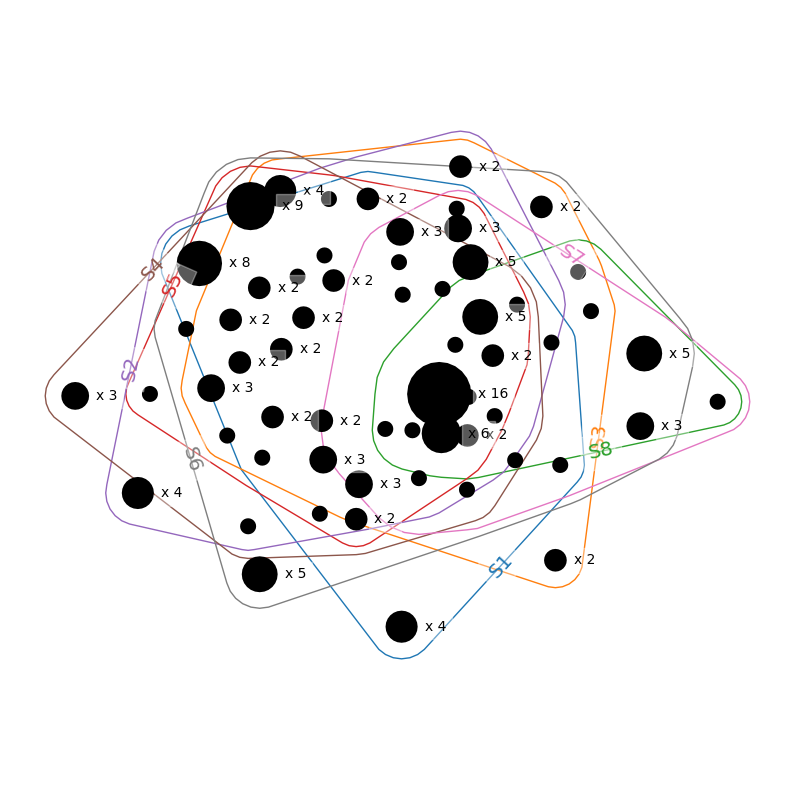

C:\Users\aless\.julia\conda\3\lib\site-packages\hypernetx\drawing\rubber_band.py:97: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for nodes in H.edges()])


In [17]:
SimpleHypergraphs.draw(
    h1, 
    HyperNetX;
    no_border=true,
    collapse_nodes=true, 
    with_node_counts=true, 
    with_node_labels=true,
    edge_labels=edge_labels, 
    edge_labels_kwargs=edge_labels_kwargs
)

In [14]:
# who are the characters appearing in all 8 seasons?
most_important_character_ids = findall(x->x==1, (length.(h.v2he) .== 8))

for id in most_important_character_ids
    println(SimpleHypergraphs.get_vertex_meta(h, id))
end

White_Walker
Jon_Snow
Sansa_Stark
Arya_Stark
Theon_Greyjoy
Cersei_Lannister
Jaime_Lannister
Tyrion_Lannister
Daenerys_Targaryen
Jorah_Mormont
Drogon
Rhaegal
Viserion
Lord_Varys
Samwell_Tarly
Bronn


## Hypergraph with each scene as an edge

In [83]:
# Let's have a closer look of what's happening in season 1
hg = SimpleHypergraphs.hg_load("data/hg_season1.json"; format=JSON_Format(), T=Bool, V=Symbol, E=Symbol);

In [84]:
# how many characters do we have? How many scenes?
"$(nhv(hg)) characters and $(nhe(hg)) scenes"

"125 characters and 286 scenes"

### The collaboration structure of Game of Thrones.
At this point, we had an overview about how many characters appeared over the whole GoT TV series and which one of them made it till the end.

Let's find out how these characters interacted with each other in season 1. To gather insights within these complex relationships, we run a community detection algorithm on the hypergraph built considering scenes as hyperedges.

Running this algorithm, we expect to find coherent plotlines and, therefore, groups of characters frequently appearing in a scene together.

In [85]:
# Let's assure to have a single connected component
# Otherwise, we pick the largest one
cc = get_connected_components(hg)

2-element Array{Array{Int64,1},1}:
 [1, 3, 2, 5, 4, 16, 9, 13, 53, 17  …  106, 105, 88, 87, 94, 93, 101, 119, 118, 83]
 [99]

In [86]:
remove_vertex!(hg, 99)
cc = get_connected_components(hg)

1-element Array{Array{Int64,1},1}:
 [1, 3, 2, 5, 4, 16, 9, 13, 53, 17  …  106, 105, 88, 87, 94, 93, 101, 119, 118, 83]

In [98]:
# We used the label propagation (LP) algorithm
cflp = CFLabelPropagationFinder(100,1234)

comms = findcommunities(hg, cflp)

"We found $(length(comms.np)) communities in the hypergraph of the 1st season."

CFLabelPropagationFinder(100, 1234)


"We found 14 communities in the hypergraph of the 1st season."

In [88]:
# How many characters are there in each community?
length.(comms.np)

14-element Array{Int64,1}:
  1
 10
  7
  3
  8
 62
  1
 13
  8
  1
  3
  2
  1
  4

In [89]:
# Who are they?
for c in comms.np
    for character in c
       println(get_vertex_meta(h8, character)) 
    end
    println("-----")
end

Syrio_Forel
-----
Rhaego
Viserys_Targaryen
Irri
Jorah_Mormont
Qotho
Rakharo
Dothraki_Crone
Mago
Doreah
Mirri_Maz_Duur
-----
Bronn
Shagga
Kevan_Lannister
Chella
Timett
Lannister_Messenger
Tywin_Lannister
-----
Waymar_Royce
White_Walker
Gared
-----
Drogon
Illyrio_Mopatis
Daenerys_Targaryen
Jhiqui
Wine_Merchant
Khal_Drogo
Rhaegal
Viserion
-----
Beric_Dondarrion
Rickon_Stark
Stiv
Cersei_Lannister
Grand_Maester_Pycelle
Yoren
Sandor_Clegane
Old_Nan
Robb_Stark
Tobho_Mott
Petyr_Baelish
Nymeria
Joss
Theon_Greyjoy
Robert_Baratheon
Loras_Tyrell
Lannister_Scout
Mycah
Tommen_Baratheon
Grey_Wind
Jonos_Bracken
Jaime_Lannister
Ros
Mhaegen
Jory_Cassel
Lancel_Lannister
Osha
Arya_Stark
Wallen
Hodor
Lord_Varys
Myrcella_Baratheon
Catspaw_Assassin
Bran_Stark
Eddard_Stark
Gregor_Clegane
Tyrion_Lannister
Will
Janos_Slynt
Rickard_Karstark
Marillion
Sansa_Stark
Meryn_Trant
Varly
Septa_Mordane
Greatjon_Umber
Summer
Catelyn_Stark
Lady
Ilyn_Payne
Shaggydog
Jon_Arryn
Armeca
Royal_Steward
Hugh_of_the_Vale
Joffrey_Ba

### Some comments

Based on the communities above, we can say that the LP algorithm ran on such hypergraph revealed:
* The presence of minor communities of characters, appearing only in few scenes of the whole season. It is interesting to note that the algorithm correctly identifies background characters that do heavily not contribute to the main storyline (for now).
    - (Syrio_Forel);
    - (Waymar_Royce, White_Walker, Gared); 
    - (Three-Eyed_Raven);
    - (Hot_Pie, Red_Keep_Stableboy, Vayon_Poole, Gendry);
    - ...
 
* The other communities embody the different sub-plotlines happening in the first season. We can list:
    - two communities related to Daenerys_Targaryen and the Dothraki;
    - one community related to the events happening in Castle Black and related to Jon Snow;
    - one community related to the Houses Arryn and Frey.
    
* The last more significant community contains the majority of the characters appearing in the first season. This result makes sense as all these characters have been forced to stay together at the Red Keep. Thus, they appear in many scenes together.

### Which are the most important characters?
Identifying truly important and influential characters in a vast narrative like GoT may not be a trivial task, as it depends on the considered level of granularity. In these cases, the main character(s) in each plotline is referred with the term fractal protagonist(s), to indicate that the answer to "who is the protagonist" depends on the specific plotline.

#### Degree centrality
Who are the characters that apper in the majority of the scenes?

In [90]:
degrees = Dict{Int, Int}()

for v=1:nhv(hg)
    degrees[v] = length(gethyperedges(hg, v))
end

sorted_degrees = sort(collect(degrees), by=x->x[2], rev=true);

In [91]:
# Let's plot these data
characters = Array{String, 1}()
degrees = Array{Int, 1}()

max_c = 0

# we will visualize only characters appearing in at least 15 scenes
for c in sorted_degrees
    max_c = max_c > 15 ? break : max_c + 1

    push!(characters, string(get_vertex_meta(hg, c.first)))
    push!(degrees, c.second)
end

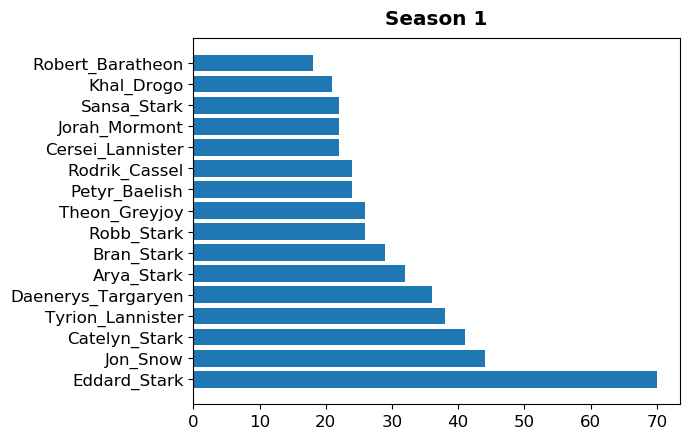

In [99]:
pos = collect(1:length(characters))

fig = plt.figure(figsize=(7, 4.5)) 
ax = fig.add_subplot(111)

rects = ax.barh(
    pos,
    degrees,
    align="center",
    tick_label=characters
)

#plt.tight_layout(.5)
plt.tick_params(labelsize="large")

plt.title("Season 1", pad=10, fontweight="semibold", fontsize="x-large")

plt.tight_layout()

#### Betweenness centrality
We investigated the importance of the characters also evaluating the betweenness centrality (BC) metric of hypergraph nodes. BC measures the centrality of a node by computing the number of times that a node acts as a bridge between the other two nodes, considering the shortest paths between them.

Here, we used the concept of *s-beetwennes-centrality*. Check out the paper for more detail about this metric.

In [100]:
# Here we evaluate betweennes value considering 1-paths, 2-paths, and 3-paths.
betweeness = Dict{Int, Dict{Symbol, Float64}}()

for s=1:3
    A = SimpleHypergraphs.adjacency_matrix(hg; s=s)
    G = LightGraphs.SimpleGraph(A)
    bc = LightGraphs.betweenness_centrality(G)

    for v=1:nhv(hg)
        push!(
            get!(betweeness, s, Dict{Symbol, Int}()),
            get_vertex_meta(hg, v) => bc[v]
        )
    end
end

In [101]:
sorted_betweeness = Dict{Int, Any}()

for s=1:3
    d = get!(betweeness, s, Dict{Symbol, Int}())
    d_sorted = sort(collect(d), by=x->x[2], rev=true)

    push!(
        sorted_betweeness,
        s => d_sorted
    )

end

In [102]:
sorted_betweeness;

In [103]:
# Getting top 10 characters for each s-value
#character => (HG_degree, G_degree)
data = Dict{Symbol, Array{Float64, 1}}()

for s=1:3
    higher_degree_characters = sorted_betweeness[s][1:10]

    for elem in higher_degree_characters
        if !haskey(data, elem.first)
            if s==1
                push!(
                    get!(data, elem.first, Array{Float64, 1}()),
                    elem.second,
                    betweeness[2][elem.first],
                    betweeness[3][elem.first]
                )
            elseif s==2
                push!(
                    get!(data, elem.first, Array{Float64, 1}()),
                    betweeness[1][elem.first],
                    elem.second,
                    betweeness[3][elem.first]
                )
            else
                push!(
                    get!(data, elem.first, Array{Float64, 1}()),
                    betweeness[1][elem.first],
                    betweeness[2][elem.first],
                    elem.second
                )
            end
        end
    end
end

#by highest betweenes degree in the graph, s=1
sorted_data = sort(collect(data), by=x->x[2][1], rev=true)

13-element Array{Pair{Symbol,Array{Float64,1}},1}:
       :Arya_Stark => [0.27141303430561975, 0.020811742624320874, 0.025567689757446024]
  :Illyrio_Mopatis => [0.25189924030387845, 0.0, 0.0]
 :Tyrion_Lannister => [0.15323433877389522, 0.08428255933571452, 0.048736052575128745]
     :Eddard_Stark => [0.11451260512166041, 0.05462031924487055, 0.051341324021137794]
    :Catelyn_Stark => [0.11139671344052993, 0.029487862630240228, 0.033451404486765125]
         :Jon_Snow => [0.11122931698056152, 0.07016200324650089, 0.05674696356665995]
             :Will => [0.06384113021458084, 0.03825136612021858, 0.0]
       :Lord_Varys => [0.06377540542298163, 0.0009193736202932523, 0.001578733585930707]
    :Rodrik_Cassel => [0.05228209175473733, 0.023788449409135447, 0.017966399768193867]
       :Bran_Stark => [0.042489406954219586, 0.0441890894890005, 0.029071370024299194]
    :Theon_Greyjoy => [0.038163554220999756, 0.030162976584305612, 0.023194820979115627]
 :Robert_Baratheon => [0.01766998385

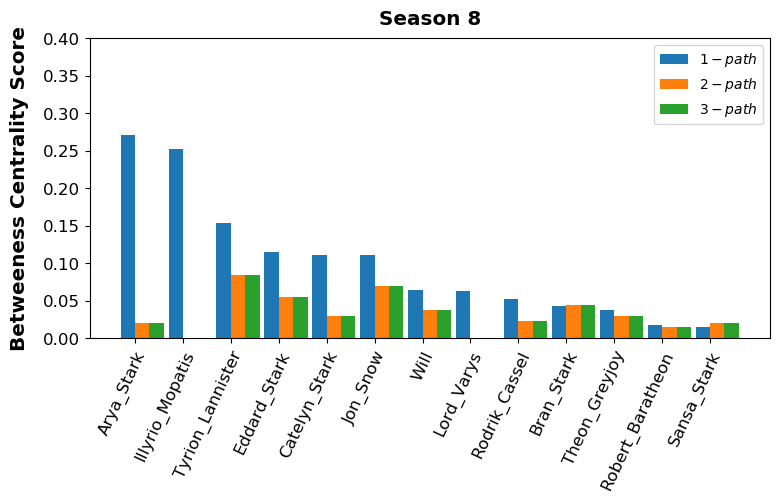

In [104]:
labels = Array{String, 1}()
s1 = Array{Float64, 1}()
s2 = Array{Float64, 1}()
s3 = Array{Float64, 1}()

for elem in sorted_data
    push!(labels, string(elem.first))
    push!(s1, elem.second[1])
    push!(s2, elem.second[2])
    push!(s3, elem.second[3])
end

clf()
fig = plt.figure(figsize=(8, 5))
ax = plt.axes([0.12, 0.32, 0.85, 0.6])

pos = collect(1:length(labels))# the x locations for the groups
width = 0.3  # the width of the bars

s1_rects = ax.bar(pos .- width/2, s1, width, label=L"$1-path$")
s2_rects = ax.bar(pos .+ width/2, s2, width, label=L"$2-path$")
s3_rects = ax.bar(pos .+ (width+width/2), s2, width, label=L"$3-path$")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.title("Season 8", pad=10, fontweight="semibold", fontsize="x-large")

#ax.set_ylabel("Betweeness Centrality Score")
plt.ylabel("Betweeness Centrality Score", fontweight="semibold", fontsize="x-large", labelpad=10)
#ax.set_title('Scores by group and gender')
ax.set_xticks(pos)
ax.set_xticklabels(labels)
#ax.set_xticklabels(hand_written_labels[season])
ax.legend()

ax.set_yticks(collect(range(0, stop=(.40 > maximum(s1) ? .4 : maximum(s1)), step=0.05))) #(season == 8 ? 25 : 10)

plt.setp( ax.xaxis.get_majorticklabels(), rotation=65, ha="right", rotation_mode="anchor")
#plt.xticks(rotation=65)
plt.tick_params(labelsize="large")

### Some comments
The plot above, showing the betweenness centrality scores using (1,2,3)-paths, reveals that removing "shallow" relationships can bring to light a completely different insight about the structure of the network we are analyzing. Specifically, in this case, it is worth noting that:
* Illyrio_Mopatis and Lord_Varys appear among the ten most important characters. However, they disappear when using (2,3)-paths, suggesting that these characters did not contribute in an evident way to the plot (but maybe behind the scenes);
* Arya_Stark appear to be the most critical character when considering 1-paths. Nonetheless, her importance decreases when switching to (2,3)-paths.

This example highlight how just using 2-paths, we can grasp how characters really interact in the plot and which are the guys who tie all characters together. 